In [36]:
 #import neccesary libraries

 import pandas as pd
 import numpy as np
 import seaborn as sns

In [37]:
#read the file

df = pd.read_csv("/content/patient_diabetes_unclean.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


1. CHECING THE NUMBER OF COLUMNS

In [38]:
#checking for number of columns

df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

2. CHANGING THE MISPLELT COLUMN NAME TO THE CORRECT NAME

In [39]:
#relize that column 'No_Pation' in hospital services that not clear meaning
#rename that column into "Patient_No"

df = df.rename(columns={"No_Pation":"Patients_No"})
df.columns


Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

3.  MISSING VALUES

In [40]:
#to check for the missing values

df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [41]:
#the missing value of 'HbA1c' is high
#replace that column with mean

mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [42]:
df['HbA1c'].dtype

dtype('float64')

In [43]:
df['HbA1c'] = df['HbA1c'].fillna(mean_value)

In [44]:
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [45]:
#the highest missing value = 0 now, so i drop others

df1 = df.dropna()
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

4. CHECK THE DOUPLICATE VALUE

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           997 non-null    int64  
 1   Patients_No  997 non-null    int64  
 2   Gender       997 non-null    object 
 3   AGE          997 non-null    float64
 4   Urea         997 non-null    float64
 5   Cr           997 non-null    float64
 6   HbA1c        997 non-null    float64
 7   Chol         997 non-null    float64
 8   TG           997 non-null    float64
 9   HDL          997 non-null    float64
 10  LDL          997 non-null    float64
 11  VLDL         997 non-null    float64
 12  BMI          997 non-null    float64
 13  CLASS        997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.8+ KB


In [47]:
#check the 'CLASS' column with dtype = object

df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [50]:
df1.groupby('CLASS')['CLASS'].agg("count")

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [ ]:
#replace the value 'Y ' and 'N '

df1['CLASS'] = df1['CLASS'].str.replace("Y ", "Y")
df1['CLASS'] = df1['CLASS'].str.replace("N ", "N")

In [52]:
df1.groupby('CLASS')['CLASS'].agg("count")

CLASS
N    103
P     53
Y    841
Name: CLASS, dtype: int64

In [53]:
df1['CLASS'].dtype

dtype('O')

4. CHECKING OUTLIERS

<Axes: >

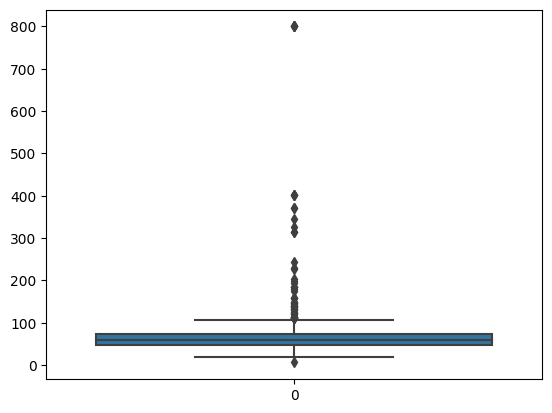

In [54]:
#use box plot to check the 'Cr' column

sns.boxplot(df1['Cr'])

In [55]:
#choose the maximun quantile to fill the outliers

max_cr = df1['Cr'].quantile(0.995)
max_cr

401.0

In [56]:
#find out the outliers

df1[df1["Cr"] > max_cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [57]:
#assigning the new dataframe

df2 = df1[df1['Cr'] < max_cr]
df2

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,188,454316,F,75.0,10.3,113.0,8.600000,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.900000,4.9,2.0,1.2,1.4,1.1,35.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


<Axes: >

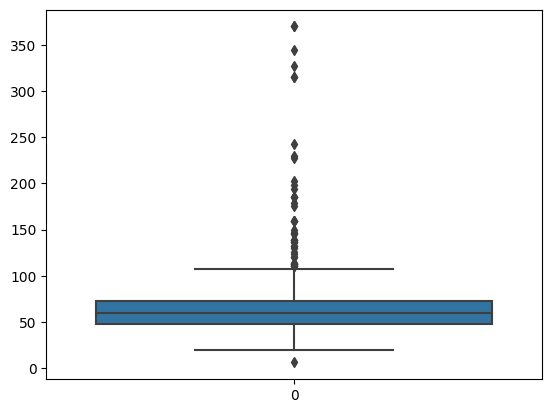

In [58]:
sns.boxplot(df2['Cr'])

<Axes: >

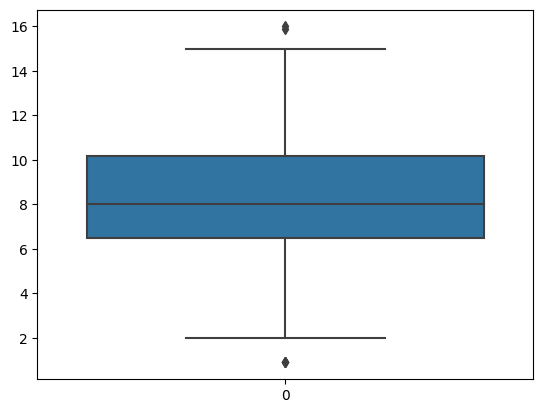

In [59]:
#checking another column 'HbA1c'

sns.boxplot(df2['HbA1c'])

5. CHECK THE DUPLICATE VALUE

In [64]:
df2.duplicated().sum()

3

In [61]:
df3 = df2.drop_duplicates()

In [62]:
df3.duplicated().sum()

0

In [63]:
#saving new dataset

df3.to_csv("Cleaned_Patient_stats_in_Diabetes.csv")